In [1]:
from lxml import etree
import pandas as pd
from collections import Counter
import os
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


wdir = "../../../resulting data/"


In [2]:
verses_features = pd.read_parquet(wdir +  "verses_features.parquet")

In [3]:
verses_features

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,#pla75
index,,,,,,,,,,,,,,,,,,,,,
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31060,b.REV.022.017,REV,022,REV.022,apocalyptic,8693,4633,4060,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31061,b.REV.022.018,REV,022,REV.022,apocalyptic,4396,1939,2457,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31062,b.REV.022.019,REV,022,REV.022,apocalyptic,3947,1952,1995,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
verses_features["bible_book"].unique()

array(['GEN', 'EXO', 'LEV', 'NUM', 'DEU', 'JOS', 'JDG', 'RUT', '1SA',
       '2SA', '1KI', '2KI', '1CH', '2CH', 'EZR', 'NEH', 'EST', 'JOB',
       'PSA', 'PRO', 'ECC', 'SON', 'ISA', 'LAM', 'JER', 'EZE', 'DAN',
       'HOS', 'JOE', 'AMO', 'OBA', 'JON', 'MIC', 'NAH', 'HAB', 'ZEP',
       'HAG', 'ZEC', 'MAL', 'MAT', 'MAR', 'LUK', 'JOH', 'ACT', 'ROM',
       '1CO', '2CO', 'GAL', 'EPH', 'PHI', 'COL', '1TH', '2TH', '1TI',
       '2TI', 'TIT', 'PHM', 'HEB', 'JAM', '1PE', '2PE', '1JO', '2JO',
       '3JO', 'JUD', 'REV'], dtype=object)

In [5]:
verses_features.head()

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,#pla75
index,,,,,,,,,,,,,,,,,,,,,
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sexual_categories = verses_features.columns.tolist()[8:287]

In [7]:
sexual_categories

['relations',
 'monogamy',
 'poligamy',
 'marriage',
 'second-marriage',
 'second-marriage-divorce',
 'second-marriage-widow',
 'interfaith-marriage',
 'interfaith-relation',
 'non-marital-relation',
 'pre-marital-relation',
 'relation-greater-family',
 'marital-relation-political-family',
 'lord-servant-relation',
 'marital-relation-direct-family',
 'arranged-marriage',
 'divorce',
 'engaged',
 'love',
 'jealousy',
 'ascendant-descendant',
 'primogeniture',
 'intercultural-ascendant-descendant',
 'outside-marriage-ascendant-descendant',
 'indirect-ascendant-descendant',
 'homosexual-relation',
 'acts',
 'social-related-act',
 'wedding',
 'deception',
 'prostitute',
 'body-related-act',
 'massage',
 'kiss',
 'hug',
 'dance',
 'abortion',
 'circumcision',
 'breast-feeding',
 'bath',
 'wash',
 'sexual-act',
 'sexual-act-stage',
 'consent',
 'seduction',
 'rejection',
 'erotic-time',
 'initation-sexual-act',
 'orgasm',
 'ejaculation',
 'time-after-sex',
 'sexual-act-type',
 'coitus',
 'fi

In [8]:
structural_categories = [column for column in verses_features.columns.tolist() if "number " in column]

In [9]:
entitiy_categories = [column for column in verses_features.columns.tolist() if "#" in column]

In [10]:
verses_features.fillna(0, inplace=True)

In [11]:
verses_features.head()

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,#pla75
index,,,,,,,,,,,,,,,,,,,,,
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Frequency'>

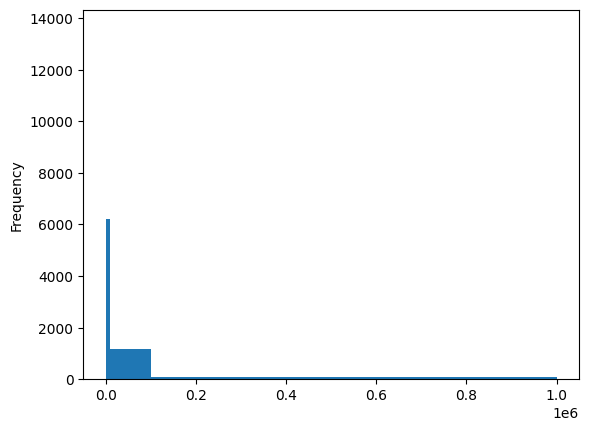

In [12]:
verses_features["twitter_freq_sum_2014_2015"].plot.hist(bins= [0,1,10,100,1000,10000,100000,1000000], )

In [13]:
verses_features[["twitter_freq_sum_2014_2015"] + structural_categories].corr( ).sort_values(by="twitter_freq_sum_2014_2015")

,twitter_freq_sum_2014_2015,number of entities referred,number of different entities referred,number of people,number of different number of people,number of groups,number of different number of groups,number of places,number of different number of places,number of times,...,number of entities receiving communication,number of different entities receiving communication,number of oral quotations,number of dream quotations,number of praying quotations,number of oath quotations,number of written quotations,number of song quotations,number of soCalled quotations,number of idea quotations
number of different entities referred,-0.103784,0.860468,1.000000,0.605711,0.665620,0.490917,0.568507,0.463758,0.499230,0.042782,...,0.420986,0.419466,0.371865,0.012203,-0.033939,0.031902,0.037629,0.015942,0.040111,0.168255
number of entities referred,-0.102385,1.000000,0.860468,0.753327,0.594732,0.588460,0.493794,0.418993,0.395809,0.039095,...,0.534902,0.479136,0.505479,0.011688,-0.036335,0.034907,0.018467,0.002036,0.088057,0.324665
number of different number of places,-0.072666,0.395809,0.499230,0.028914,-0.012274,0.079775,0.101071,0.933936,1.000000,-0.005468,...,-0.009460,-0.042375,0.015035,-0.007086,-0.055722,0.009260,-0.031974,-0.005437,-0.011513,0.027366
number of places,-0.070980,0.418993,0.463758,0.030473,-0.014291,0.077233,0.094590,1.000000,0.933936,-0.008983,...,0.014992,-0.023235,0.037526,-0.008841,-0.056009,0.008575,-0.031153,-0.006667,-0.009943,0.056191
number of different number of people,-0.066777,0.594732,0.665620,0.849954,1.000000,-0.011062,-0.027352,-0.014291,-0.012274,-0.027710,...,0.353267,0.381279,0.267594,0.034901,0.058405,0.021537,-0.017244,0.016492,-0.007355,0.101508
number of people,-0.066636,0.753327,0.605711,1.000000,0.849954,0.055027,0.017920,0.030473,0.028914,-0.017407,...,0.440671,0.424259,0.392091,0.031510,0.039541,0.030173,-0.022388,0.002398,0.013773,0.254545
number of oral quotations,-0.064548,0.505479,0.371865,0.392091,0.267594,0.405956,0.336171,0.037526,0.015035,0.002984,...,0.825918,0.765872,1.000000,-0.020763,-0.191179,-0.006110,-0.052782,-0.061648,0.032042,0.382509
number of groups,-0.056207,0.588460,0.490917,0.055027,-0.011062,1.000000,0.855918,0.077233,0.079775,0.002517,...,0.411562,0.354140,0.405956,-0.014582,-0.083010,0.020541,0.079644,0.006428,0.156866,0.234288
number of entities communicating,-0.055092,0.541744,0.381550,0.427469,0.281760,0.435552,0.349400,0.024353,-0.001877,-0.003026,...,0.910341,0.839880,0.857984,0.031214,0.084895,0.034793,0.120580,0.037300,0.168153,0.593613
number of quotations,-0.053726,0.530923,0.369622,0.418757,0.270904,0.427163,0.342799,0.023029,-0.004565,-0.003026,...,0.913403,0.839862,0.877790,0.032944,0.085426,0.035235,0.142841,0.027395,0.169104,0.595883


In [14]:
verses_features[["twitter_freq_sum_2014_2015"] + entitiy_categories[0:150]].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).head(20)

,twitter_freq_sum_2014_2015,#tim3,#per14,#pla41,#per17,#org0,#per145,#per241,#pla77,#pla39,...,#pla105,#pla106,#tim15,#per199,#per200,#per451,#per156,#per2,#per141,#per148
twitter_freq_sum_2014_2015,1.000000,0.011735,0.003489,0.003628,0.031607,0.030659,0.003287,0.002765,-0.000689,-0.003456,...,-0.000979,-0.000979,-0.000969,-0.002167,-0.002169,-0.002175,-0.003371,-0.013056,-0.003316,-0.002206
#per17,0.031607,0.011879,0.001665,-0.004568,1.000000,0.003131,-0.003491,-0.002468,-0.001736,0.006291,...,-0.000528,-0.000528,-0.000528,-0.001181,-0.001181,-0.001181,-0.002057,-0.008077,-0.001796,-0.001268
#org0,0.030659,0.000190,0.063022,0.082963,0.003131,1.000000,-0.006380,-0.001846,-0.007127,-0.002602,...,-0.002168,-0.002168,-0.002168,-0.004849,-0.004849,-0.004849,-0.006969,-0.025525,-0.003737,-0.005205
#pla18,0.013242,0.011115,0.023223,0.088876,0.017732,0.040378,0.000413,-0.002681,-0.001885,-0.002540,...,-0.000574,-0.000574,-0.000574,-0.001283,-0.001283,-0.001283,-0.002234,-0.003699,-0.001951,-0.001377
#tim3,0.011735,1.000000,0.007002,0.037362,0.011879,0.000190,-0.001155,-0.000817,-0.000574,-0.000774,...,-0.000175,-0.000175,-0.000175,-0.000391,-0.000391,-0.000391,-0.000680,-0.003121,-0.000594,-0.000419
#pla41,0.003628,0.037362,0.073265,1.000000,-0.004568,0.082963,0.027333,0.015309,0.012673,-0.003996,...,0.027647,0.027647,-0.000902,-0.002018,-0.002018,-0.002018,-0.003514,-0.002291,-0.003069,-0.002166
#per14,0.003489,0.007002,1.000000,0.073265,0.001665,0.063022,0.015397,0.016567,0.016155,-0.000569,...,-0.004147,-0.004147,-0.004147,-0.009275,-0.009275,-0.009275,-0.003799,0.024032,-0.007578,-0.009956
#per145,0.003287,-0.001155,0.015397,0.027333,-0.003491,-0.006380,1.000000,0.442226,0.123542,0.017769,...,-0.000213,-0.000213,-0.000213,-0.000476,-0.000476,-0.000476,-0.000829,-0.003801,-0.000724,-0.000511
#per241,0.002765,-0.000817,0.016567,0.015309,-0.002468,-0.001846,0.442226,1.000000,0.041140,-0.000666,...,-0.000150,-0.000150,-0.000150,-0.000336,-0.000336,-0.000336,-0.000586,-0.002688,-0.000512,-0.000361
#per20,0.002747,0.023451,0.017057,0.019162,0.000666,0.014378,0.008781,0.091116,0.027086,-0.001698,...,-0.000384,-0.000384,-0.000384,-0.000858,-0.000858,-0.000858,-0.001494,-0.005676,-0.001304,-0.000921


In [15]:
verses_features[["twitter_freq_sum_2014_2015"] + entitiy_categories[0:150]].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).tail(20)

,twitter_freq_sum_2014_2015,#tim3,#per14,#pla41,#per17,#org0,#per145,#per241,#pla77,#pla39,...,#pla105,#pla106,#tim15,#per199,#per200,#per451,#per156,#per2,#per141,#per148
#per168,-0.004009,-0.000703,-0.016697,0.002752,-0.002126,-0.008730,-0.000857,-0.000606,-0.000426,-0.000574,...,-0.000130,-0.000130,-0.000130,0.099744,-0.000290,-0.000290,-0.000505,-0.002315,-0.000441,-0.000311
#per162,-0.004041,-0.000989,-0.004486,0.025839,-0.002990,-0.010085,-0.001204,-0.000852,-0.000599,-0.000807,...,-0.000182,-0.000182,-0.000182,-0.000408,-0.000408,-0.000408,-0.000710,-0.003255,-0.000620,-0.000437
#pla17,-0.004042,-0.000857,0.006326,-0.004425,-0.002590,0.001662,-0.001043,-0.000738,-0.000519,-0.000699,...,-0.000158,-0.000158,-0.000158,-0.000353,-0.000353,-0.000353,-0.000615,0.017660,-0.000537,-0.000379
#per158,-0.004102,-0.000974,-0.002350,0.021485,-0.002943,-0.009269,-0.001186,-0.000838,-0.000590,-0.000794,...,-0.000179,-0.000179,-0.000179,-0.000401,-0.000401,-0.000401,-0.000699,-0.003204,-0.000610,-0.000431
#pla81,-0.004563,-0.000798,-0.006982,-0.004120,-0.002411,0.005469,-0.000971,-0.000687,-0.000483,-0.000651,...,-0.000147,-0.000147,-0.000147,-0.000329,-0.000329,-0.000329,-0.000572,-0.002625,-0.000500,-0.000353
#org54,-0.004596,-0.000839,0.002465,-0.004335,-0.002537,-0.004179,-0.001022,-0.000723,-0.000508,-0.000685,...,-0.000155,-0.000155,-0.000155,-0.000346,-0.000346,-0.000346,-0.000602,-0.002762,-0.000526,-0.000371
#per144,-0.004642,-0.001069,-0.007019,0.021579,-0.003231,-0.011347,-0.001302,-0.000920,-0.000647,-0.000872,...,-0.000197,-0.000197,0.210752,-0.000440,-0.000440,-0.000440,-0.000767,-0.003518,-0.000670,-0.000473
#pla64,-0.004785,-0.000938,-0.000372,-0.004845,-0.002835,-0.010625,-0.001142,-0.000808,-0.000568,0.042301,...,-0.000173,-0.000173,-0.000173,-0.000386,-0.000386,-0.000386,-0.000673,0.010460,-0.000588,-0.000415
#pla23,-0.005012,-0.000976,0.019606,0.001468,-0.002951,0.005503,-0.001189,-0.000841,-0.000591,-0.000796,...,-0.000180,-0.000180,-0.000180,-0.000402,-0.000402,-0.000402,-0.000700,-0.003213,-0.000612,-0.000432
#org57,-0.005650,-0.000985,-0.008785,-0.005088,-0.002977,-0.009784,-0.001199,-0.000848,-0.000597,-0.000804,...,-0.000181,-0.000181,-0.000181,-0.000406,-0.000406,-0.000406,-0.000707,-0.003242,-0.000617,-0.000436


In [16]:
verses_features[["twitter_freq_sum_2014_2015"] + sexual_categories].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).head(20)

,twitter_freq_sum_2014_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,...,horse,donkey,cow,camel,plants,flowers,trees,palms,time,part-of-the-day
twitter_freq_sum_2014_2015,1.000000,-0.001859,-0.001189,-0.003564,-0.007083,-0.000946,NaN,-0.000670,-0.000574,-0.002258,...,-0.000902,-0.000835,-0.000835,-0.003082,NaN,-0.002691,-0.001247,-0.001386,NaN,NaN
love,0.054186,-0.001302,-0.001127,-0.002109,0.009044,-0.000797,NaN,-0.000460,-0.001722,-0.001029,...,0.069958,-0.000460,-0.000460,-0.001455,NaN,0.201720,0.098937,0.098937,NaN,NaN
flesh,0.026825,-0.000591,-0.000511,-0.000957,-0.002143,-0.000362,NaN,-0.000209,-0.000781,-0.000467,...,-0.000209,-0.000209,-0.000209,-0.000660,NaN,-0.000723,-0.000295,-0.000295,NaN,NaN
veil,0.014770,-0.000091,-0.000079,-0.000148,-0.000330,-0.000056,NaN,-0.000032,-0.000120,-0.000072,...,-0.000032,-0.000032,-0.000032,-0.000102,NaN,-0.000112,-0.000046,-0.000046,NaN,NaN
song,0.012846,-0.000091,-0.000079,-0.000148,-0.000330,-0.000056,NaN,-0.000032,-0.000120,-0.000072,...,-0.000032,-0.000032,-0.000032,-0.000102,NaN,-0.000112,-0.000046,-0.000046,NaN,NaN
body,0.012124,-0.000952,-0.000825,-0.001543,0.005924,-0.000583,NaN,-0.000337,-0.001260,-0.000753,...,-0.000337,-0.000337,-0.000337,-0.001065,NaN,0.026538,-0.000476,-0.000476,NaN,NaN
men,0.008979,0.396028,-0.000493,-0.000922,0.044925,-0.000348,NaN,-0.000201,-0.000753,-0.000450,...,-0.000201,-0.000201,-0.000201,-0.000636,NaN,-0.000697,-0.000284,-0.000284,NaN,NaN
homosexuals,0.004819,-0.000091,-0.000079,-0.000148,-0.000330,-0.000056,NaN,-0.000032,-0.000120,-0.000072,...,-0.000032,-0.000032,-0.000032,-0.000102,NaN,-0.000112,-0.000046,-0.000046,NaN,NaN
gay-sex,0.003957,-0.000158,-0.000137,-0.000256,-0.000572,-0.000097,NaN,-0.000056,-0.000209,-0.000125,...,-0.000056,-0.000056,-0.000056,-0.000176,NaN,-0.000193,-0.000079,-0.000079,NaN,NaN
homosexual-sex,0.003881,-0.000129,-0.000112,-0.000209,-0.000467,-0.000079,NaN,-0.000046,-0.000170,-0.000102,...,-0.000046,-0.000046,-0.000046,-0.000144,NaN,-0.000158,-0.000064,-0.000064,NaN,NaN


In [17]:
verses_features[["twitter_freq_sum_2014_2015"] + sexual_categories].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).head(100)

,twitter_freq_sum_2014_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,...,horse,donkey,cow,camel,plants,flowers,trees,palms,time,part-of-the-day
twitter_freq_sum_2014_2015,1.000000,-0.001859,-0.001189,-0.003564,-0.007083,-0.000946,NaN,-0.000670,-0.000574,-0.002258,...,-0.000902,-0.000835,-0.000835,-0.003082,NaN,-0.002691,-0.001247,-0.001386,NaN,NaN
love,0.054186,-0.001302,-0.001127,-0.002109,0.009044,-0.000797,NaN,-0.000460,-0.001722,-0.001029,...,0.069958,-0.000460,-0.000460,-0.001455,NaN,0.201720,0.098937,0.098937,NaN,NaN
flesh,0.026825,-0.000591,-0.000511,-0.000957,-0.002143,-0.000362,NaN,-0.000209,-0.000781,-0.000467,...,-0.000209,-0.000209,-0.000209,-0.000660,NaN,-0.000723,-0.000295,-0.000295,NaN,NaN
veil,0.014770,-0.000091,-0.000079,-0.000148,-0.000330,-0.000056,NaN,-0.000032,-0.000120,-0.000072,...,-0.000032,-0.000032,-0.000032,-0.000102,NaN,-0.000112,-0.000046,-0.000046,NaN,NaN
song,0.012846,-0.000091,-0.000079,-0.000148,-0.000330,-0.000056,NaN,-0.000032,-0.000120,-0.000072,...,-0.000032,-0.000032,-0.000032,-0.000102,NaN,-0.000112,-0.000046,-0.000046,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trees,-0.001247,-0.000129,-0.000112,-0.000209,-0.000467,-0.000079,NaN,-0.000046,-0.000170,-0.000102,...,-0.000046,-0.000046,-0.000046,-0.000144,NaN,-0.000158,1.000000,-0.000064,NaN,NaN
house,-0.001261,-0.000129,-0.000112,-0.000209,-0.000467,-0.000079,NaN,-0.000046,-0.000170,-0.000102,...,-0.000046,-0.000046,-0.000046,-0.000144,NaN,-0.000158,-0.000064,-0.000064,NaN,NaN
masturbation,-0.001313,-0.000129,-0.000112,-0.000209,-0.000467,-0.000079,NaN,-0.000046,-0.000170,-0.000102,...,-0.000046,-0.000046,-0.000046,-0.000144,NaN,-0.000158,-0.000064,-0.000064,NaN,NaN
honey,-0.001321,-0.000129,-0.000112,-0.000209,-0.000467,-0.000079,NaN,-0.000046,-0.000170,-0.000102,...,-0.000046,-0.000046,-0.000046,-0.000144,NaN,-0.000158,-0.000064,-0.000064,NaN,NaN


In [18]:
verses_features["twitter_freq_sum_2014_2015"].sort_values()

index
14634         0
12064         8
12076         9
11112         9
12065         9
          ...  
26674    299317
16460    328235
26136    331092
30435    360391
29455    875311
Name: twitter_freq_sum_2014_2015, Length: 31065, dtype: int64

In [19]:
verses_features.loc[verses_features["twitter_freq_sum_2014_2015"] == 1]

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,#pla75
index,,,,,,,,,,,,,,,,,,,,,


In [20]:
verses_features[verses_features["coitus"] > 0 ]["bible_identifier"].values.tolist()

['b.GEN.004.001',
 'b.GEN.004.017',
 'b.GEN.004.025',
 'b.GEN.016.002',
 'b.GEN.016.003',
 'b.GEN.016.004',
 'b.GEN.020.004',
 'b.GEN.024.016',
 'b.GEN.024.067',
 'b.GEN.026.010',
 'b.GEN.029.023',
 'b.GEN.029.030',
 'b.GEN.030.003',
 'b.GEN.030.004',
 'b.GEN.030.016',
 'b.GEN.034.002',
 'b.GEN.034.007',
 'b.GEN.035.022',
 'b.GEN.038.002',
 'b.GEN.038.016',
 'b.GEN.038.018',
 'b.GEN.039.007',
 'b.GEN.039.010',
 'b.GEN.039.012',
 'b.GEN.039.014',
 'b.GEN.039.015',
 'b.GEN.039.017',
 'b.GEN.039.018',
 'b.GEN.049.004',
 'b.LEV.015.018',
 'b.RUT.004.013',
 'b.1SA.001.019',
 'b.MAT.001.025',
 'b.MAT.019.005',
 'b.MAT.019.006',
 'b.JOH.008.004',
 'b.JOH.008.005']

In [21]:
verses_features["number of 1st level quotations"].sum()

18815.0

In [22]:
verses_features["bible_book"].unique()

array(['GEN', 'EXO', 'LEV', 'NUM', 'DEU', 'JOS', 'JDG', 'RUT', '1SA',
       '2SA', '1KI', '2KI', '1CH', '2CH', 'EZR', 'NEH', 'EST', 'JOB',
       'PSA', 'PRO', 'ECC', 'SON', 'ISA', 'LAM', 'JER', 'EZE', 'DAN',
       'HOS', 'JOE', 'AMO', 'OBA', 'JON', 'MIC', 'NAH', 'HAB', 'ZEP',
       'HAG', 'ZEC', 'MAL', 'MAT', 'MAR', 'LUK', 'JOH', 'ACT', 'ROM',
       '1CO', '2CO', 'GAL', 'EPH', 'PHI', 'COL', '1TH', '2TH', '1TI',
       '2TI', 'TIT', 'PHM', 'HEB', 'JAM', '1PE', '2PE', '1JO', '2JO',
       '3JO', 'JUD', 'REV'], dtype=object)

<AxesSubplot:>

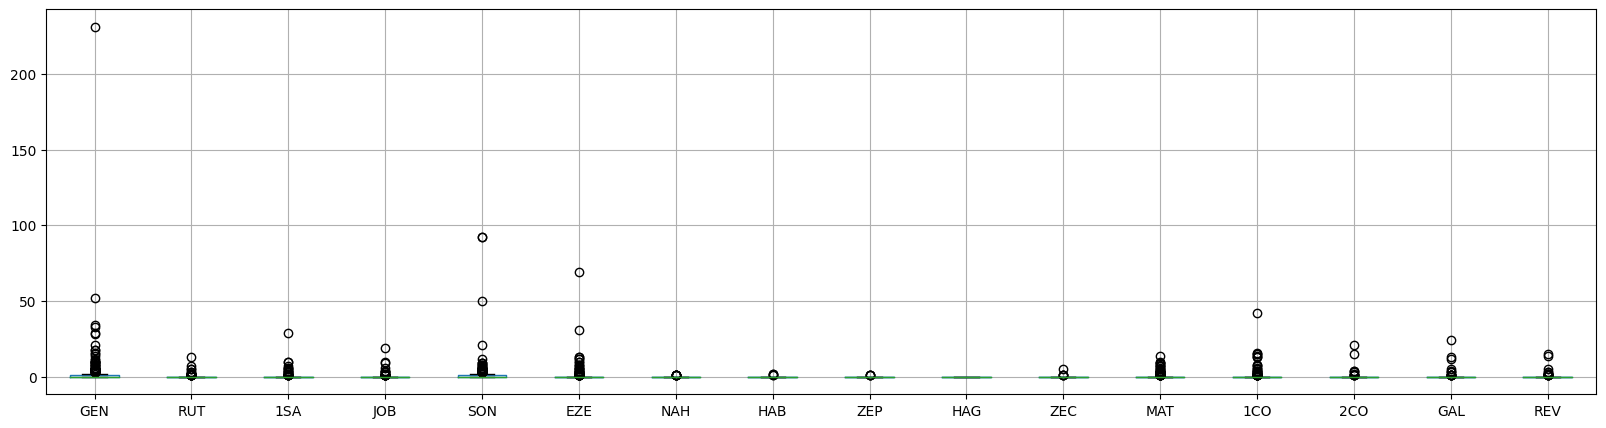

In [23]:
verses_features[sexual_categories+["bible_book"]].groupby(["bible_book"]).sum().T[["GEN","RUT","1SA","JOB", "SON","EZE" , "NAH",
"HAB",
"ZEP",
"HAG",
"ZEC",
"MAT", #"ROM",
"1CO",
"2CO",
"GAL",
"REV",]].boxplot(figsize=(20,5))

In [24]:
verses_features[sexual_categories].sum().sort_values()

part-of-the-day              0.0
sexual-act-participants      0.0
sexual-act-situation         0.0
other-sexual-act             0.0
voyerism                     0.0
                           ...  
body                       109.0
sex-outside-marriage       117.0
birth                      148.0
love                       203.0
ascendant-descendant       947.0
Length: 279, dtype: float64